## Setup ## 

In [1]:
"""Visualize embeddings produced"""
import numpy as np
import tensorflow as tf 
import h5py
import matplotlib.pyplot as plt
import os

from skimage import measure

import utils
import nearest_vectors

%load_ext autoreload
%autoreload 2

os.environ['CUDA_VISIBLE_DEVICES'] = ''

ROOT = '/usr/people/kluther/Projects/metric_segmentation/'

In [2]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

## Compute center vectors, pixel centroids, for each object ## 

In [3]:
"""Load data"""
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'image.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'human_labels_split.h5'), 'r')['main']

em_imgs_train = em_imgs[:192]
seg_imgs_train = seg_imgs[:192]
em_imgs_dev = em_imgs[192:]
seg_imgs_dev = seg_imgs[192:]


In [27]:
"""Load data"""
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'voronoi_boundary.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'voronoi_segmentation.h5'), 'r')['main']

em_imgs_train = em_imgs[:16]
seg_imgs_train = seg_imgs[:16]
em_imgs_dev = em_imgs[16:]
seg_imgs_dev = seg_imgs[16:]


In [5]:
"""Load model"""
N = 40000 #Iteration number
EXP_NAME = 'j_loss_embed_dim_32_affinity_128'
MODEL_NAME = os.path.join(ROOT, 'experiments', EXP_NAME, 'models', 'model{}.ckpt'.format(N))

tf.reset_default_graph()
sess = tf.Session()
inputs, outputs = utils.load_model(MODEL_NAME, sess)

INFO:tensorflow:Restoring parameters from /usr/people/kluther/Projects/metric_segmentation/experiments/j_loss_embed_dim_32_affinity_128/models/model40000.ckpt


In [6]:
"""Get centroids, mean vectors for each object (note only sampling a region from each image right now)"""
# Train
centroids_dev, vectors_dev = {}, {} 
for i in range(len(em_imgs_dev)):
    if i % 5 == 0: print("Processing img: {}".format(i))
    em_img, seg_img = em_imgs_dev[i][:572,:572], seg_imgs_dev[i][92:572-92,92:572-92]
    vec_img = utils.generate_vector_labels(inputs, outputs, em_img, sess)
    centroids, vectors = nearest_vectors.find_object_ids_centroids_vectors([seg_img], [vec_img])
    
    centroids = [(2**20*i+ID, val) for ID,val in centroids.items()]
    vectors = [(2**20*i+ID, val) for ID,val in vectors.items()]
    centroids_dev.update(centroids)
    vectors_dev.update(vectors)
    


Processing img: 0
Processing img: 5
Processing img: 10
Processing img: 15
Processing img: 20
Processing img: 25
Processing img: 30
Processing img: 35
Processing img: 40
Processing img: 45
Processing img: 50
Processing img: 55
Processing img: 60


## Display nearest neighbors ##

In [7]:
list(centroids_dev.items())[:10]

[(3074, [155, 63, 0]),
 (3075, [242, 0, 0]),
 (3077, [267, 39, 0]),
 (3078, [299, 250, 0]),
 (3079, [341, 342, 0]),
 (3080, [344, 239, 0]),
 (4099, [159, 301, 0]),
 (15361, [117, 171, 0]),
 (15362, [277, 135, 0]),
 (15363, [283, 257, 0])]

In [24]:
def affinity(x,y):
    return np.exp(-0.5*np.linalg.norm(x-y, axis=-1)**2)
i=1
affinity(vectors_dev[i*2**20+3074],vectors_dev[3074])

0.53792019655855738

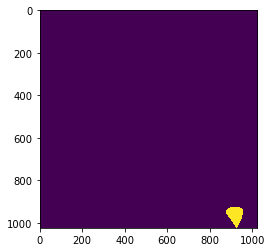

[0 1]


In [11]:
plt.imshow(seg_imgs[0] == 1);plt.show()
print(np.unique(labels_dev))

[(10489860, 0.66147232), (36940802, 0.51571554), (3080, 0.49815586), (4743169, 0.48211646), (45287425, 0.47620711), (26414081, 0.47179815), (1597441, 0.47106478), (52989953, 0.45635816), (55744513, 0.45599315), (9660417, 0.45034808)]


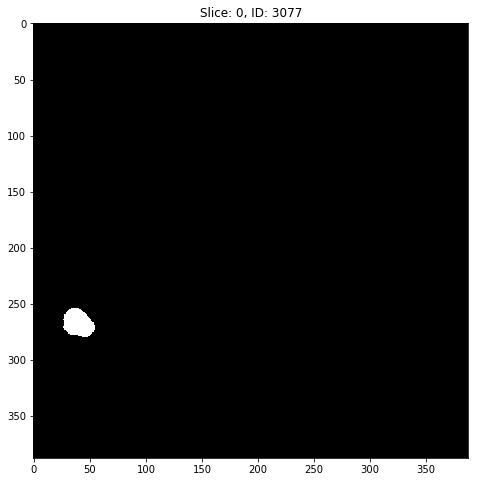

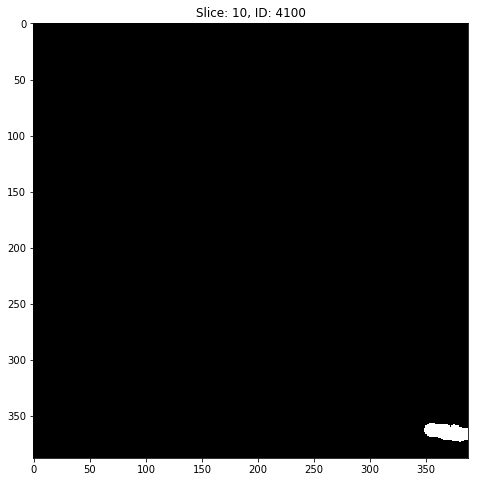

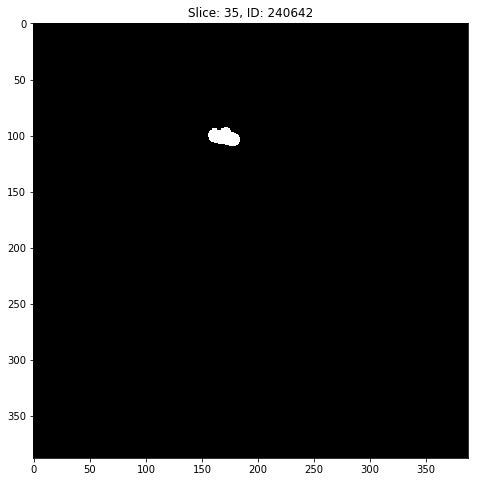

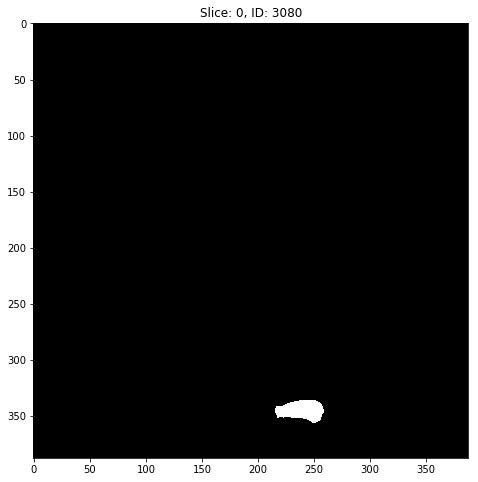

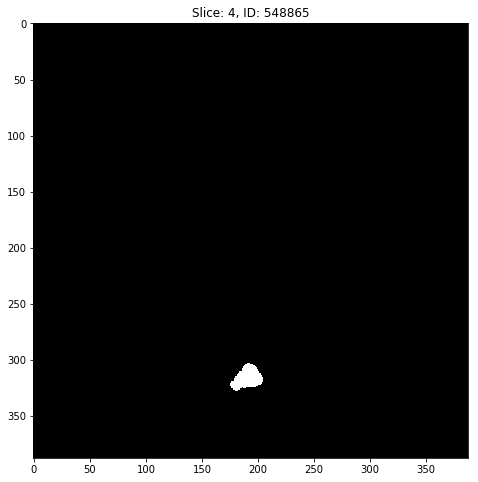

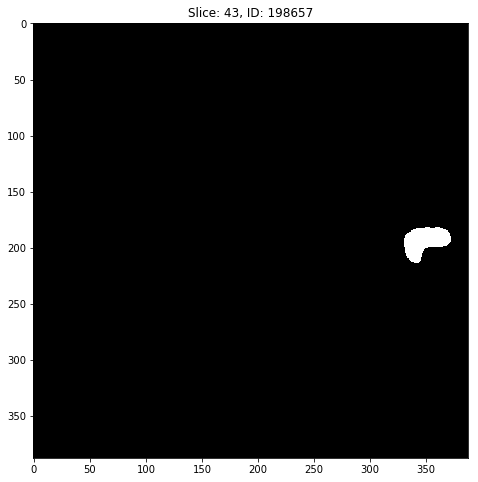

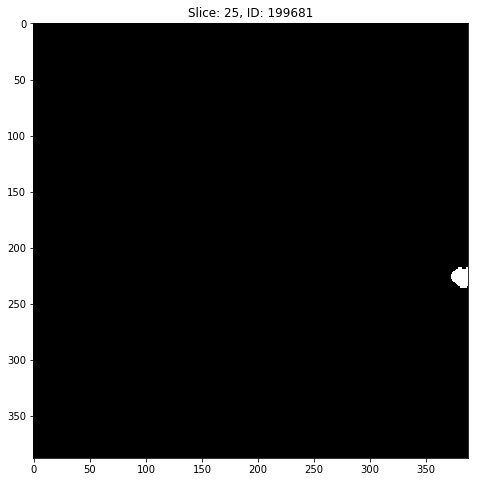

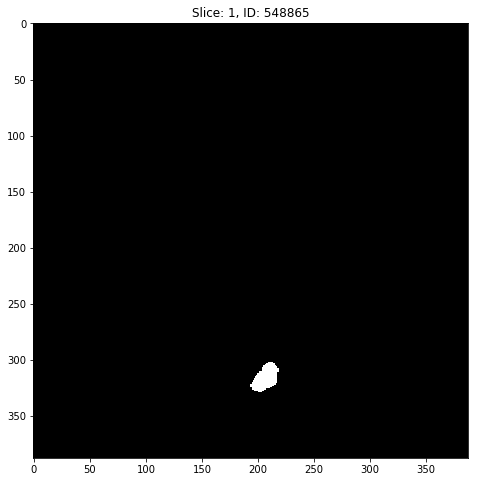

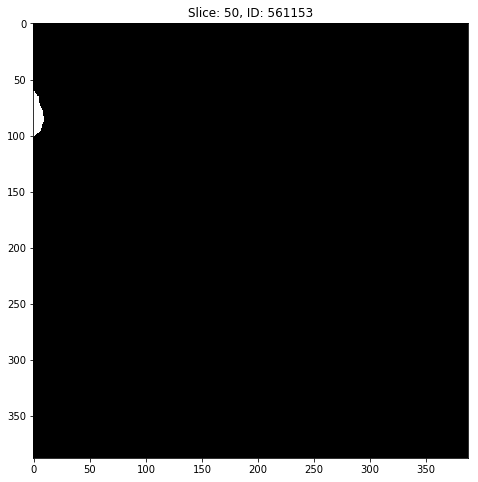

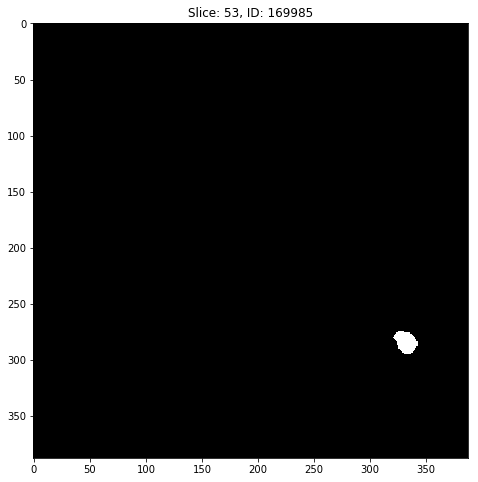

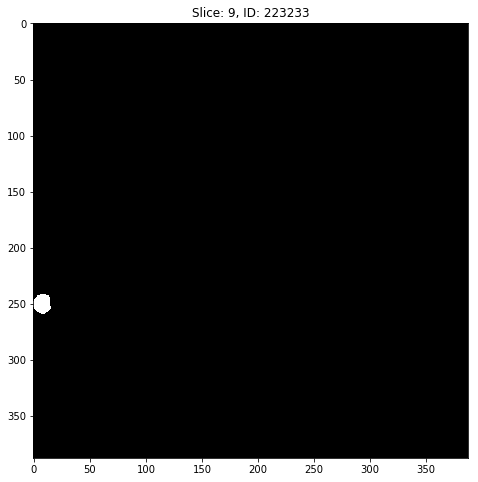

In [12]:
def show_k_nearest(vec_id, k, vectors):
    knn = nearest_vectors.k_nearest_neighbors(vectors, vec_id, k)
    ids = [(vec_id // 2**20, vec_id % 2**20)] + [(ID // 2**20, ID % 2**20) for ID, aff in knn]
    #ids = [(ID // 2**20, ID % 2**20) for ID, aff in knn]
    print(knn)
    for i,j in ids:
        i = int(i)
        j = int(j)
        seg_img = seg_imgs_dev[i][:572, :572]
        mask = np.zeros_like(seg_img)
        mask[seg_img==j] = 1
        mask[572:,:] = 0
        mask[:,572:] = 0
        plt.figure(figsize=(8,8))
        plt.title("Slice: {}, ID: {}".format(i,j))
        plt.imshow(mask[92:480, 92:480], cmap='gray')
        plt.show()

show_k_nearest(3077, 10, vectors_dev)

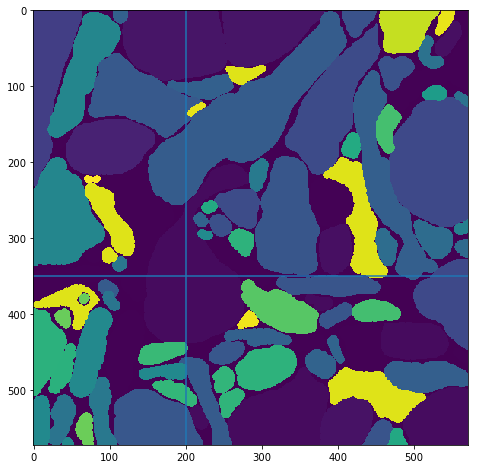

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(seg_imgs_dev[4,:572,:572])
plt.axhline(350); plt.axvline(200)
plt.show()

In [22]:
seg_imgs_dev[4,:572,:572][350, 200]

15361

In [61]:
20071425 // 2**20, 20071425 % 2** 20

(19, 148481)

In [65]:
list(vectors_dev.items())[0]

(3074, array([  1.63871735e-01,   1.30712956e-01,  -1.31645873e-01,
         -2.72949040e-02,   3.36121842e-02,  -2.24652782e-01,
         -3.55437547e-02,  -2.61077750e-02,  -1.99783117e-01,
          1.68137372e-01,   1.81536332e-01,  -3.07852738e-02,
         -3.80986392e-01,  -1.05080828e-01,  -3.46047133e-01,
          1.92539841e-01,   3.91653180e-01,   1.44871935e-01,
          1.24784753e-01,  -1.67103752e-01,  -1.82247683e-01,
          4.02590930e-02,   4.90246713e-02,   2.22804956e-02,
         -4.91210856e-02,   5.91932163e-02,  -1.51308954e-01,
         -1.74884886e-01,   1.82254210e-01,  -3.13466102e-01,
          1.88283957e-04,  -5.64324670e-02], dtype=float32))

In [27]:
nearest_vectors.affinity(vectors_dev[4*2**20+15361], vectors_dev[3*2**20+15362])

0.14604411

In [28]:
len(vectors_dev)

3339

In [33]:
len(em_imgs_dev)

64